# Risø campus

In [1]:
%%time
from recast.CPT import CPT
import numpy as np
from pathlib import Path

CPU times: user 823 ms, sys: 287 ms, total: 1.11 s
Wall time: 1.4 s


In [2]:
layout = CPT()
layout.MESH_EXTENT = 5000 # in m
layout.MESH_RES = 100 # in m
layout.AVERAGE_RANGE = 4000 # in m 
layout.PULSE_LENGTH = 200 # in ns
layout.FFT_SIZE = 64 # no points
layout.ACCUMULATION_TIME = 1000 # in ms

# setting path to the folder 
# where to store the output data
layout.set_path('/Users/niva/Desktop/recast-test', 
                path_type = 'output')

# setting path to the landcover data 
layout.set_path('/Volumes/Secondary_Drive/work/projects/campaign-planning-tool/data/input/landcover/g100_clc12_V18_5.tif', 
                path_type = 'landcover')

layout.set_utm_zone('33T')
layout.MAX_ELEVATION_ANGLE = 45

points = np.array([
[576697.34, 4845753, 395 + 80],
[576968, 4845595, 439 + 80],
[577215, 4845425, 423 + 80],
[577439, 4845219, 430 + 80],
[577752, 4845005, 446 + 80],
[577979, 4844819, 478 + 80],
[578400, 4844449, 453 + 80],
[578658, 4844287, 450 + 80],
[578838, 4844034, 430 + 80],
[578974, 4843842, 417 + 80],
[579121, 4844186, 413 + 80],
[579246, 4843915, 410 + 80]
])
layout.add_measurement_instances(points = points, points_type = 'initial')
layout.generate_mesh()

Path /Users/niva/Desktop/recast-test set for storing CPT outputs
Path /Volumes/Secondary_Drive/work/projects/campaign-planning-tool/data/input/landcover/g100_clc12_V18_5.tif set for landcover data
Correct latitudinal zone!
Correct longitudinal zone!
UTM zone set
Measurement points 'initial' added to the measurements dictionary!
Measurements dictionary contains 1 different measurement type(s).


In [3]:
layout.generate_combined_layer(points_type = 'initial')

Generating combined layer for initial measurement points!
Correct latitudinal zone!
Correct longitudinal zone!
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1
Station 1 of 1


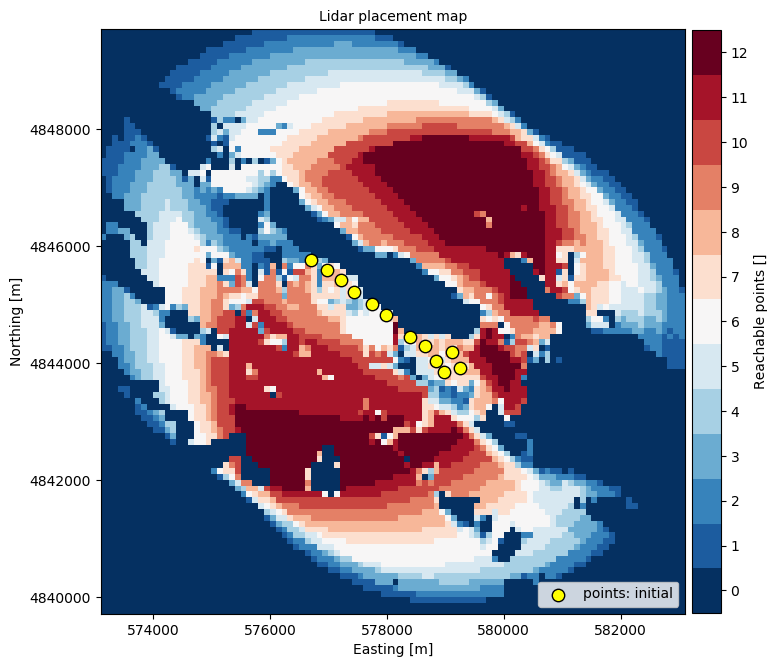

In [4]:
layout.plot_layer(layout.layer_selector('combined'), 
                  title = 'Lidar placement map' , 
                  legend_label = 'Reachable points []')

In [5]:
layout.add_lidar_instance(position = np.array([578886, 4847688, 179]),
                          lidar_id = 'brise')

Lidar 'brise' added to the lidar dictionary, which now contains 1 lidar instance(s).


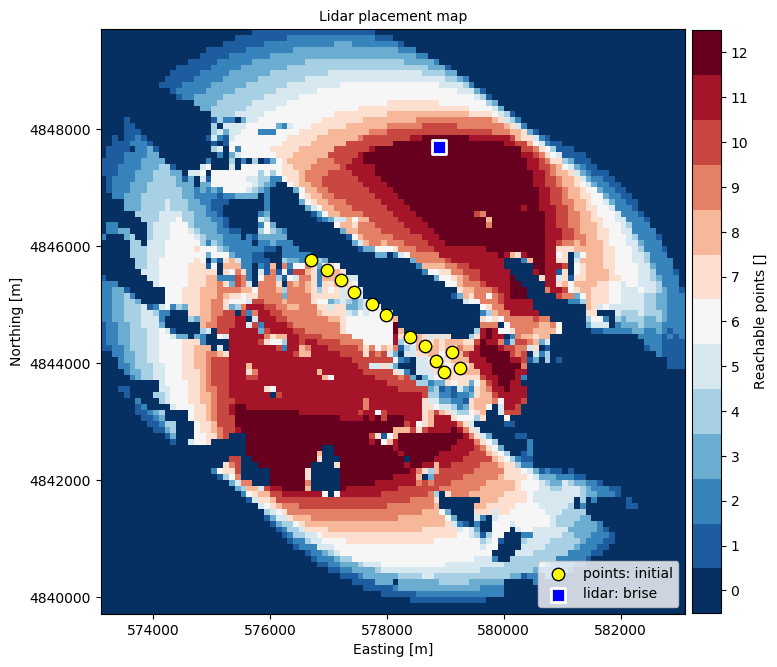

In [6]:
layout.plot_layer(layout.layer_selector('combined'), 
                  title = 'Lidar placement map' , 
                  legend_label = 'Reachable points []')

In [7]:
layout.generate_second_lidar_layer(lidar_id = 'brise')

Updating lidar instance 'brise' considering measurement type 'initial'.


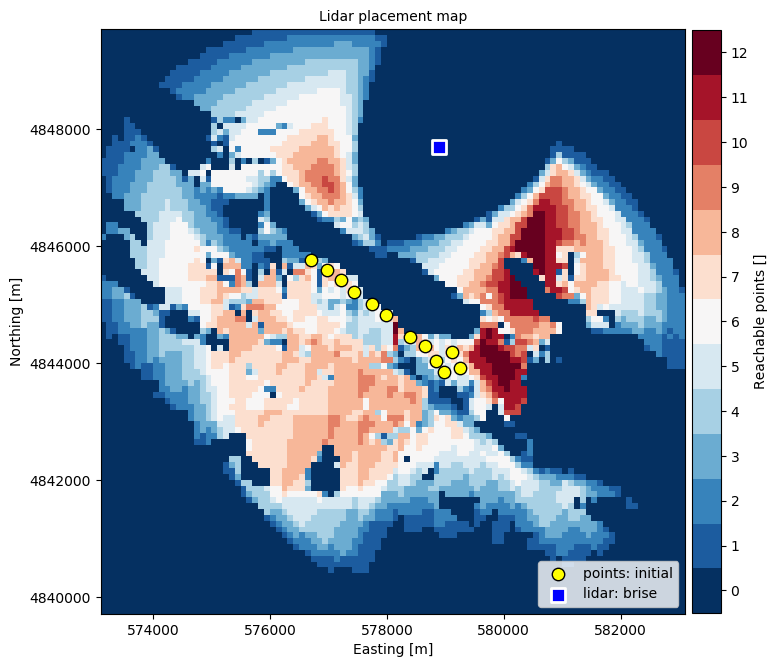

In [8]:
layout.plot_layer(layout.layer_selector('second_lidar_placement'), 
                  title = 'Lidar placement map' , 
                  legend_label = 'Reachable points []')

In [9]:
layout.add_lidar_instance(position = np.array([580460, 4846018, 220]), 
                          lidar_id = 'sirocco')

Lidar 'sirocco' added to the lidar dictionary, which now contains 2 lidar instance(s).


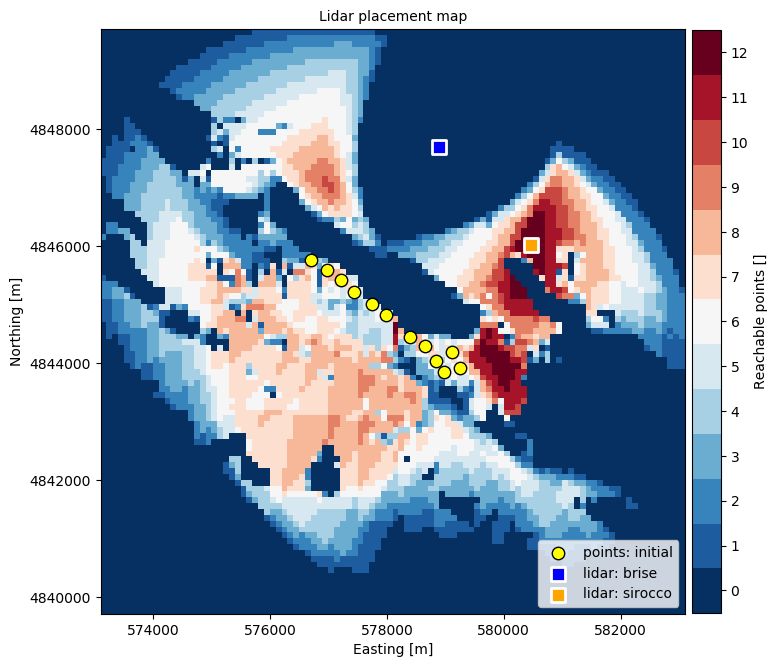

In [10]:
layout.plot_layer(layout.layer_selector('second_lidar_placement'), 
                  title = 'Lidar placement map' , 
                  legend_label = 'Reachable points []')

In [11]:
layout.optimize_trajectory(lidar_ids = ['brise', 'sirocco'], points_type = 'initial', sync = True)

Lidar instances:['brise', 'sirocco'] will be updated with the optimized trajectory
Updating lidar instance 'brise' considering measurement type 'initial'.
Updating lidar instance 'sirocco' considering measurement type 'initial'.
Synchronizing trajectories for lidar instances:['brise', 'sirocco']


In [12]:
layout.export_kml(lidar_ids = ['brise', 'sirocco'], layers = ['combined', 'second_lidar_placement'])
layout.export_measurement_scenario(lidar_ids = ['brise', 'sirocco'])